In [1]:
import scipy.integrate as intode
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import pandas as pd


In [407]:
solvemethod='Radau'
problem=4

In [406]:
k=80000
km=250000
r=1025*9.8*np.pi
rm=8890.7
mv=2433
mf=4866
if(problem==3):
    ma=1028.876
    Ia=7001.914
    mu=683.4558
    muM=654.3383
    w=1.7152
    f=3640
    L=1690
elif(problem==4):
    ma=1091.099
    Ia=7142.493
    mu=528.5018
    muM=1655.909
    w=1.9806
    f=1760
    L=2140
elif(problem==5):
    ma=1091.099
    Ia=7142.493
    mu=528.5018
    muM=1655.909
    w=1.9806
    f=1760
    L=0
    

prd=2*np.pi/w
tmax=prd*40
titv=0.2
nu1=10000
num1=1000
g=9.8
l=0.5

In [408]:
R=1
Hcone=0.8
Hclnd=3
M=mf
LL=np.sqrt(R**2+Hcone**2)
temp=np.pi*R*LL+2*np.pi*R*Hclnd
mcone=np.pi*R*LL*M/temp
mclnd=2*np.pi*R*Hclnd*M/temp

If=mclnd*R*R/2+mclnd*Hclnd**2/3+mcone*R*R/4+mcone*Hcone*Hcone/6

rr,h=0.5,0.5
Iv0=mv*rr**2/4+mv*h**2/12

In [409]:
def equ(t,x,nu,nuM):
    xv=x[0]
    xf=x[1]
    tv=x[2]
    tf=x[3]
    vv=x[4]
    vf=x[5]
    wv=x[6]
    wf=x[7]
    dxv=vv
    dxf=vf
    dtv=wv
    dtf=wf
    dwf=(-rm*tf-muM*wf+nuM*wv+km*tv+L*np.cos(w*t))/(If+Ia)
    Iv=Iv0+mv*xv**2
    dwv=(-nuM*wv-km*tv+mv*g*xv*np.sin(tv+tf))/Iv-dwf
    m=mf+ma+mv*np.sin(tv+tf)**2
    dvf=(k*(xv-l+mv*g/k)*np.cos(tv+tf)+nu*vv*np.cos(tv+tf)-mu*vf+f*np.cos(w*t)-r*xf+np.sin(tv+tf)*(mv*(xv*dwv+2*vv*wv+xv*dwf+2*vv*wf)-mv*g*np.sin(tv+tf)))/m
    dvv=(-k*(xv-l)-nu*vv-mv*g*np.cos(tv+tf)-mv*(-xv*wv**2+dvf*np.cos(tv+tf)-xv*wf**2-2*xv*wf*wv))/mv
    return np.array([dxv,dxf,dtv,dtf,dvv,dvf,dwv,dwf])

In [422]:

nu1,num1=res.x[0],res.x[1]
nu1,num1

(55384.971135991254, 88032.31963484568)

In [411]:
print(rm,muM,num1,km,L)
print(mclnd,mcone)
print(mv,If,Ia,L,w)
print(k,nu1,mu,r)

8890.7 1655.909 88032.31963484568 250000 2140
4010.095371151983 855.904628848018
2433 14340.606449987732 7142.493 2140 1.9806
80000 55384.971135991254 528.5018 31557.29820530947


In [412]:

te=np.arange(start=0,stop=tmax,step=titv)

In [413]:
del xres

In [416]:
try:
    x0=np.array([xres[i][-1] for i in range(8)])
except:
    x0=np.array([l-mv*g/k,0,0,0,0,0,0,0])
print(x0)
sol=intode.solve_ivp(lambda t,x:equ(t,x,nu1,num1),(te[0],te[-1]),x0,method=solvemethod,t_eval=te)

[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]


In [418]:
xres=sol.y
tres=sol.t

data=pd.DataFrame(np.transpose(xres))
writer=pd.ExcelWriter('3-xres.xlsx')
data.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()


data=pd.DataFrame(np.transpose(tres))
writer=pd.ExcelWriter('3-t.xlsx')
data.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()

In [419]:
xvres=xres[0]
xfres=xres[1]
tvres=xres[2]
tfres=xres[3]
vvres=xres[4]
vfres=xres[5]
wvres=xres[6]
wfres=xres[7]

In [233]:
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, '$\\dot x_{f}$(m/s)')

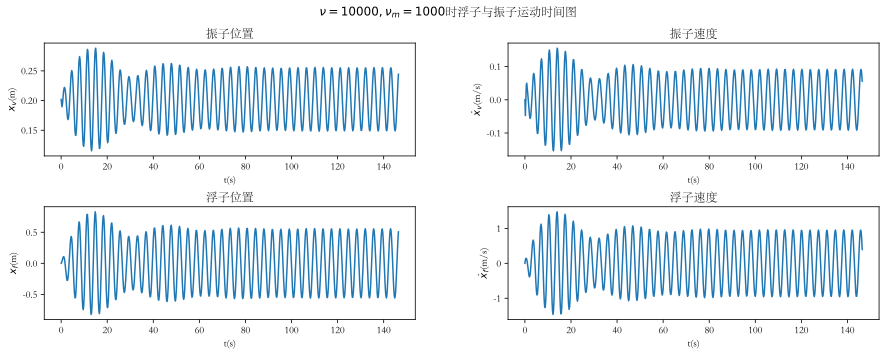

In [250]:
plt.figure(figsize=(15,5))
plt.suptitle(r'$\nu=10000,\nu_m=1000$时浮子与振子运动时间图')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.subplot(2,2,1)
plt.plot(tres,xvres)
plt.title('振子位置')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{v}$(m)')
plt.subplot(2,2,2)
plt.plot(tres,vvres)
plt.title('振子速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{v}$(m/s)')
plt.subplot(2,2,3)
plt.plot(tres,xfres)
plt.title('浮子位置')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{f}$(m)')
plt.subplot(2,2,4)
plt.plot(tres,vfres)
plt.title('浮子速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{f}$(m/s)')

Text(0, 0.5, '$\\dot x_{f}$(m/s)')

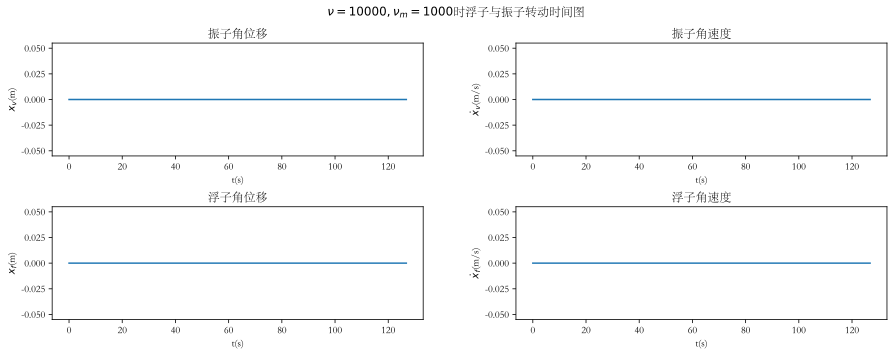

In [235]:
plt.figure(figsize=(15,5))
plt.suptitle(r'$\nu=10000,\nu_m=1000$时浮子与振子转动时间图')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.subplot(2,2,1)
plt.plot(tres,tvres)
plt.title('振子角位移')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{v}$(m)')
plt.subplot(2,2,2)
plt.plot(tres,wvres)
plt.title('振子角速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{v}$(m/s)')
plt.subplot(2,2,3)
plt.plot(tres,tfres)
plt.title('浮子角位移')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{f}$(m)')
plt.subplot(2,2,4)
plt.plot(tres,wfres)
plt.title('浮子角速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{f}$(m/s)')

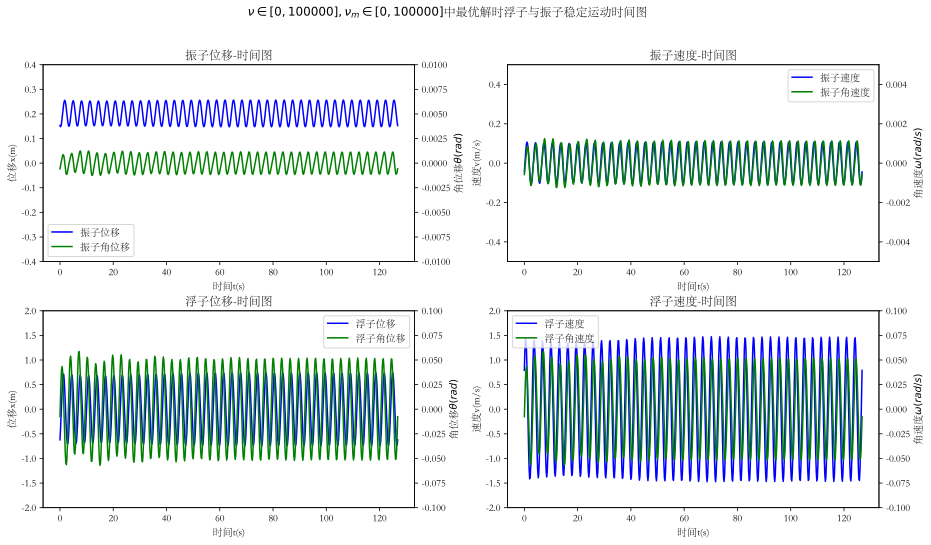

In [421]:
fig = plt.figure(figsize=(15, 8))

plt.suptitle(r'$\nu\in[0,100000],\nu_m\in[0,100000]$中最优解时浮子与振子稳定运动时间图')
plt.subplots_adjust(wspace=0.25,hspace=0.25)

ax1 = fig.add_subplot(2,2,1)

ax1.set_ylim(-0.4,0.4)
 
ha11,=ax1.plot(tres,xvres,color='b')
ax1.set_ylabel('位移x(m)')
ax1.set_title("振子位移-时间图")  
ax1.set_xlabel('时间t(s)')
 
bx1 = ax1.twinx()
bx1.set_ylim(-0.01,0.01)
hb11,=bx1.plot(tres,wvres,color='g')
bx1.set_ylabel(r'角位移$\theta(rad)$')

ax1.legend([ha11,hb11,],['振子位移','振子角位移'])
 
 
ax2 = fig.add_subplot(2,2,3)

ax2.set_ylim(-2,2)
 
ha2,=ax2.plot(tres,xfres,color='b')
ax2.set_ylabel('位移x(m)')
ax2.set_title("浮子位移-时间图")  
ax2.set_xlabel('时间t(s)')
 
bx2 = ax2.twinx()
bx2.set_ylim(-0.1,0.1)
hb2,=bx2.plot(tres,wfres,color='g')
bx2.set_ylabel(r'角位移$\theta(rad)$')

ax2.legend([ha2,hb2],['浮子位移','浮子角位移'])



ax3 = fig.add_subplot(2,2,2)

ax3.set_ylim(-0.5,0.5)
 
ha3,=ax3.plot(tres,vvres,color='b')
ax3.set_ylabel('速度v(m/s)')
ax3.set_title("振子速度-时间图")  
ax3.set_xlabel('时间t(s)')
 
bx3 = ax3.twinx()
bx3.set_ylim(-0.005,0.005)
hb3,=bx3.plot(tres,wvres,color='g')
bx3.set_ylabel(r'角速度$\omega(rad/s)$')

ax3.legend([ha3,hb3],['振子速度','振子角速度'])


ax4 = fig.add_subplot(2,2,4)

ax4.set_ylim(-2,2)
 
ha4,=ax4.plot(tres,vfres,color='b')
ax4.set_ylabel('速度v(m/s)')
ax4.set_title("浮子速度-时间图")  
ax4.set_xlabel('时间t(s)')
 
bx4 = ax4.twinx()
bx4.set_ylim(-0.1,0.1)
hb4,=bx4.plot(tres,wfres,color='g')
bx4.set_ylabel(r'角速度$\omega(rad/s)$')

ax4.legend([ha4,hb4],['浮子速度','浮子角速度'])


 

In [285]:
def calcP(nu,nuM,res):
    vv=res[4]
    wv=res[6]
    
    pv=nu*vv**2
    pw=nuM*wv**2
    p=pv+pw
    return p

In [134]:
def Dint(arr,h):
    #复合辛普森积分
    n=len(arr)
    sum=0
    if (n%2==0):
        sum+=(arr[-1]+arr[-2])*h/2
        n-=1
    tsum=arr[0]+arr[n-1]
    for i in range(1,n-1):
        if(i%2):
            tsum+=4*arr[i]
        else:
            tsum+=2*arr[i]
    sum+=tsum*h/3
    return sum

In [296]:
p=calcP(nu1,num1,xres)
totalW=Dint(p,titv)
print(' 平均功率为 ',totalW/tmax)

 平均功率为  54.577821789222384


In [136]:
def errequ(nu,num):
    sol=intode.solve_ivp(lambda t,x:equ(t,x,nu,num),(te[0],te[-1]),x0,method=solvemethod,t_eval=te)
    xres=sol.y
    p=calcP(nu,num,xres)
    paverage=Dint(p,titv)/tmax
    print(nu,'&&',num,'->',paverage)
    return -paverage

In [137]:
aa=np.linspace(start=0,stop=100000,num=200)
cc=np.linspace(start=0,stop=100000,num=100)
X,Y=np.meshgrid(aa,cc)
dd=[[-errequ(i,j) for j in cc] for i in aa]

0.0 && 0.0 -> 0.0
0.0 && 1010.10101010101 -> 0.06666866308324328
0.0 && 2020.20202020202 -> 0.10686893225638082
0.0 && 3030.30303030303 -> 0.1442469796705824
0.0 && 4040.40404040404 -> 0.17887554687334248
0.0 && 5050.50505050505 -> 0.21061546920258772
0.0 && 6060.60606060606 -> 0.23950149802857112
0.0 && 7070.707070707071 -> 0.2656192812454106
0.0 && 8080.80808080808 -> 0.28922922506942417
0.0 && 9090.90909090909 -> 0.31030643327529883
0.0 && 10101.0101010101 -> 0.32920991248632203
0.0 && 11111.111111111111 -> 0.3459651431689692
0.0 && 12121.21212121212 -> 0.36073389848021253
0.0 && 13131.31313131313 -> 0.3737730439969385
0.0 && 14141.414141414141 -> 0.38496060352055256
0.0 && 15151.51515151515 -> 0.3946973584474389
0.0 && 16161.61616161616 -> 0.4029999429496149
0.0 && 17171.71717171717 -> 0.4099678453546672
0.0 && 18181.81818181818 -> 0.41585374835323163
0.0 && 19191.91919191919 -> 0.4205637511581745
0.0 && 20202.0202020202 -> 0.4242959943916442
0.0 && 21212.121212121212 -> 0.42713544

In [138]:
Z=np.array(dd)
Z=np.transpose(Z)

Text(0.5, 0, '功率$p(N\\cdot m/s)$')

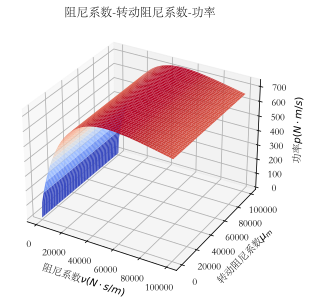

In [188]:
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('阻尼系数-转动阻尼系数-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'转动阻尼系数$\mu_m$')
ax.set_zlabel(r'功率$p(N\cdot m/s)$')

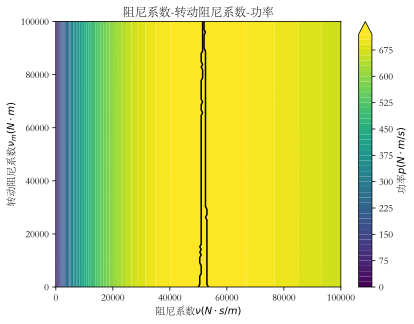

In [315]:
from cProfile import label


cs=plt.contourf(X,Y,Z,50,extend='max')

plt.title('阻尼系数-转动阻尼系数-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'转动阻尼系数$\nu_m(N\cdot m)$')
plt.colorbar(cs,label=r'功率$p(N\cdot m/s)$')
plt.contour(X,Y,Z>731.17,1,colors=['None','Black'])

In [310]:
max(max(dd))

731.3789224768683

In [307]:
nunum0=[10000,50000]
ptstore=np.array(nunum0)
def drawpt(x):
    global ptstore
    plt.scatter(x[0],x[1],color='b')
    plt.plot([x[0],ptstore[0]],[x[1],ptstore[1]],color='b')
    ptstore=x

10000.0 && 50000.0 -> 149.16708755229482
10500.0 && 50000.0 -> 155.1012725718154
10000.0 && 52500.0 -> 149.16847969002478
10500.0 && 52500.0 -> 155.10135451530743
10750.0 && 53750.0 -> 158.01939236551786
11250.0 && 51250.0 -> 163.75411373888778
11875.0 && 50625.0 -> 170.74096839375727
12125.0 && 54375.0 -> 173.4797279529376
12937.5 && 56562.5 -> 182.1604978028988
14062.5 && 53437.5 -> 193.64221173568907
15718.75 && 53281.25 -> 209.44259872592355
16781.25 && 59218.75 -> 218.91394315503155
19234.375 && 63515.625 -> 238.90913521151464
22015.625 && 60234.375 -> 258.63409873546306
26554.6875 && 62070.3125 -> 284.8328396371335
30070.3125 && 72304.6875 -> 300.67382169600904
37246.09375 && 81816.40625 -> 323.2316389683927
44566.40625 && 80371.09375 -> 335.83275488109524
57232.421875 && 88798.828125 -> 341.3388361799161
67923.828125 && 100000.0 -> 336.45608989535503
87910.15625 && 100000.0 -> 316.8410320727474
49912.109375 && 88107.91015625 -> 340.1706580856684
39220.703125 && 76906.73828125 ->

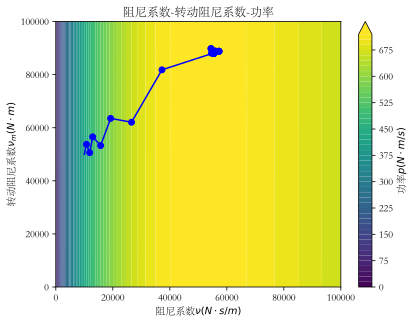

In [308]:



cs=plt.contourf(X,Y,Z,50,extend='max')

plt.title('阻尼系数-转动阻尼系数-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'转动阻尼系数$\nu_m(N\cdot m)$')
plt.colorbar(cs,label=r'功率$p(N\cdot m/s)$')

res=opt.minimize(lambda x:errequ(x[0],x[1]),nunum0,method='Nelder-Mead',bounds=[(0,100000),(0,100000)],tol=0.0001,callback=drawpt)

print(res)
print(-errequ(res.x[0],res.x[1]))

In [300]:
print(res)

 final_simplex: (array([[5.56616182e+04, 7.86878467e+00],
       [5.56616182e+04, 7.86878467e+00],
       [5.56616182e+04, 7.86878467e+00]]), array([-389.7401169, -389.7401169, -389.7401169]))
           fun: -389.7401169006697
       message: 'Optimization terminated successfully.'
          nfev: 275
           nit: 106
        status: 0
       success: True
             x: array([5.56616182e+04, 7.86878467e+00])


In [110]:
testa=np.array([1,2,3,4,5])
testa[len(testa)-1]

5

In [121]:
itemp=np.arange(start=0,stop=10.01,step=0.1)
arr=[np.exp(i) for i in itemp]
print(itemp[-1])
print(Dint(arr,0.1))

10.0
22025.478016624784


# 稳定性分析

In [429]:
def equt(t,x,nu,nuM,f,L,w,k,km):
    xv=x[0]
    xf=x[1]
    tv=x[2]
    tf=x[3]
    vv=x[4]
    vf=x[5]
    wv=x[6]
    wf=x[7]
    dxv=vv
    dxf=vf
    dtv=wv
    dtf=wf
    dwf=(-rm*tf-muM*wf+nuM*wv+km*tv+L*np.cos(w*t))/(If+Ia)
    Iv=Iv0+mv*xv**2
    dwv=(-nuM*wv-km*tv+mv*g*xv*np.sin(tv+tf))/Iv-dwf
    m=mf+ma+mv*np.sin(tv+tf)**2
    dvf=(k*(xv-l+mv*g/k)*np.cos(tv+tf)+nu*vv*np.cos(tv+tf)-mu*vf+f*np.cos(w*t)-r*xf+np.sin(tv+tf)*(mv*(xv*dwv+2*vv*wv+xv*dwf+2*vv*wf)-mv*g*np.sin(tv+tf)))/m
    dvv=(-k*(xv-l)-nu*vv-mv*g*np.cos(tv+tf)-mv*(-xv*wv**2+dvf*np.cos(tv+tf)-xv*wf**2-2*xv*wf*wv))/mv
    return np.array([dxv,dxf,dtv,dtf,dvv,dvf,dwv,dwf])

In [430]:
def calcPow(nu,nuM,f,L,w,k,km):
    print(x0)
    sol=intode.solve_ivp(lambda t,x:equt(t,x,nu,nuM,f,L,w,k,km),(te[0],te[-1]),x0,method=solvemethod,t_eval=te)
    xres=sol.y
    tres=sol.t
    p=calcP(nu,nuM,xres)
    index=xres[1]/np.cos(xres[3])+np.tan(xres[3])
    return Dint(p,titv)/tmax,max(index)
    

In [431]:
nu0,num0=63707.41352811264, 82257

In [432]:
nu0,num0=res.x[0],res.x[1]
nu0,num0

(55384.971135991254, 88032.31963484568)

In [433]:
ff=range(0,2500,40)
mm=[0 for i in ff]
pp=mm[:]
for i in range(len(ff)):
    temp=calcPow(nu0,num0,ff[i],L,w,k,km)
    mm[i]=temp[1]
    pp[i]=temp[0]

[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  

Text(2339.24, 0.7, 'x=2289.24')

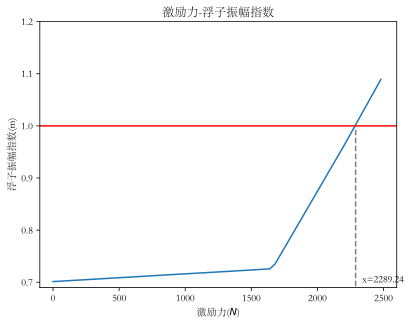

In [444]:

plt.plot(ff,mm)
plt.ylim(0.69,1.2)
plt.xlim(-100,2600)
plt.plot(range(-1000,9000,1000),[1 for i in range(-1000,9000,1000)],color='r')
plt.title('激励力-浮子振幅指数')
plt.xlabel(r'激励力($N$)')
plt.ylabel('浮子振幅指数(m)')
xxx=2289.24
plt.vlines([xxx],[0],[1],linestyles='dashed',colors=['grey'])
plt.text(xxx+50,0.7,r'x='+str(xxx))

Text(1989.24, 0.52, 'y=1939.24')

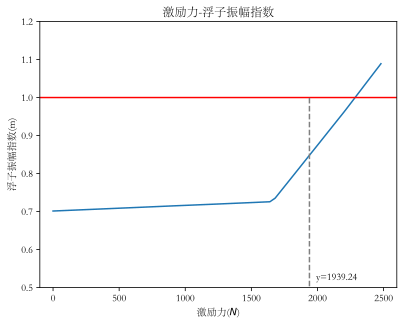

In [427]:

plt.plot(ff,mm)
plt.ylim(0.5,1.2)
plt.xlim(-100,2600)
plt.plot(range(-1000,9000,1000),[1 for i in range(-1000,9000,1000)],color='r')
plt.title('激励力-浮子振幅指数')
plt.xlabel(r'激励力($N$)')
plt.ylabel('浮子振幅指数(m)')
xxx=1939.24
plt.vlines([xxx],[0],[1],linestyles='dashed',colors=['grey'])
plt.text(xxx+50,0.52,r'y='+str(xxx))

In [424]:
ll=range(0,7500,100)
mm=[0 for i in ll]
pp=mm[:]
for i in range(len(ll)):
    temp=calcPow(nu0,num0,f,ll[i],w,k,km)
    mm[i]=temp[1]
    pp[i]=temp[0]

[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  7.89918822e-01 -5.77238485e-04 -7.57552437e-03]
[ 1.52857728e-01 -6.21709785e-01 -2.16116207e-04 -2.11566044e-02
 -4.45298972e-02  

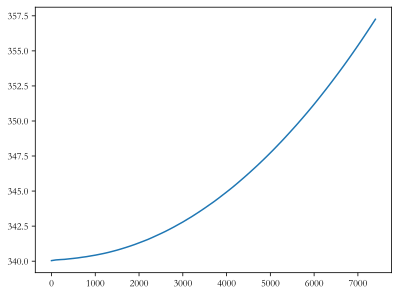

In [400]:
plt.plot(ll,pp)

Text(6982.31, 0.883, 'x=6932.31')

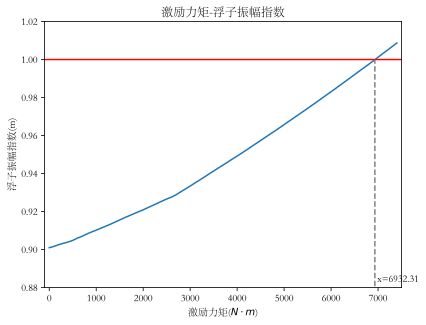

In [423]:

plt.plot(ll,mm)
plt.ylim(0.88,1.02)
plt.xlim(-100,7500)
plt.plot(range(-1000,9000,1000),[1 for i in range(-1000,9000,1000)],color='r')
plt.title('激励力矩-浮子振幅指数')
plt.xlabel(r'激励力矩($N\cdot m$)')
plt.ylabel('浮子振幅指数(m)')
xxx=6932.31
plt.vlines([xxx],[0],[1],linestyles='dashed',colors=['grey'])
plt.text(xxx+50,0.883,r'x='+str(xxx))